In [2]:
import pandas as pd
import re
import io

def extract_masses(line_string):
    """
    Extracts the two floating-point mass values from the 'line' string.

    The string format is assumed to be:
    "[fragment_info] @ mass_1 & [fragment_info] @ mass_2"

    It uses a regular expression to find two instances of a floating-point
    number that follows an '@' symbol, which are separated by an '&' symbol.

    Args:
        line_string (str): The string from the 'line' column containing mass data.

    Returns:
        list: A list containing two floats [mass_1, mass_2].
              Returns [None, None] if fewer than two masses are found.
    """
    if pd.isna(line_string):
        return [None, None]

    # Regular Expression Pattern:
    # 1. @\s* -> Matches '@' followed by any number of whitespace characters
    # 2. ([\d\.]+) -> Captures one or more digits or dots (the floating-point number)
    # 3. (?:.*?)   -> Non-capturing group matching any character non-greedily (to find the next @)
    # The pattern is run twice (find all) to capture the first two matches.
    matches = re.findall(r'@\s*([\d\.]+)', line_string)

    if len(matches) >= 2:
        # Convert captured strings to floats
        try:
            mass_1 = float(matches[0])
            mass_2 = float(matches[1])
            return [mass_1, mass_2]
        except ValueError:
            # Handle cases where the captured string wasn't a valid float
            print(f"Warning: Could not convert mass strings to float in line: {line_string}")
            return [None, None]
    else:
        # Handle cases where only one or zero masses were found
        return [None, None]


# --- Simulation of CSV Import ---


# Use io.StringIO to read the string data as if it were a file
df = pd.read_csv('data/data_classification/classified_msms_data7.csv')

# --- Data Extraction and DataFrame Update ---

# 1. Apply the function to the 'line' column. This results in a Series
#    where each element is a list: [mass_1, mass_2].
extracted_masses = df['line'].apply(extract_masses)

# 2. Use pd.Series to split the list of two values into two new, temporary columns.
#    Then assign these temporary columns directly to the DataFrame.
df[['mass_1', 'mass_2']] = extracted_masses.apply(pd.Series)

# 3. Convert the newly created columns to the float data type (they are objects/strings initially)
df['mass_1'] = pd.to_numeric(df['mass_1'], errors='coerce')
df['mass_2'] = pd.to_numeric(df['mass_2'], errors='coerce')

In [3]:
aa_mass = {
    "G": 57,
    "A": 71,
    "S": 87,
    "P": 97,
    "V": 99,
    "T": 101,
    "C": 103,
    "I": 113,
    "L": 113,
    "N": 114,
    "D": 115,
    "K": 128,
    "Q": 128,
    "E": 129,
    "M": 131,
    "H": 137,
    "F": 147,
    "R": 156,
    "Y": 163,
    "W": 186
}

In [4]:
df['sum'] = df['mass_1'] + df['mass_2']
df = df.sort_values('sum', ascending=False)
df['sum_cleared'] = df['sum'] - 14 - 18 - 1
df = df[:-1]
#df['sum_cleared'] = df['sum_cleared'].astype('int')
df


,n,classification,line,mass_1,mass_2,sum,sum_cleared
2,3,usable,y7 (1+) @ 784.38 & b3 (1+) @ 469.1,784.38,469.10,1253.48,1220.48
31,32,usable,y8 (1+) @ 965.41 & b2 (1+) @ 287.94,965.41,287.94,1253.35,1220.35
3,4,usable,y4 (1+) @ 511.14 & b6 (1+) @ 742.16,511.14,742.16,1253.30,1220.30
0,1,usable,y5 (1+) @ 568.12 & b5 (1+) @ 685.12,568.12,685.12,1253.24,1220.24
1,2,usable,y6 (1+) @ 671.16 & b4 (1+) @ 582.03,671.16,582.03,1253.19,1220.19
5,6,usable,y3 (1+) @ 410.06 & b7 (1+) @ 843.07,410.06,843.07,1253.13,1220.13
13,14,usable,y2 (1+) @ 310.82 & b8 (1+) @ 941.96,310.82,941.96,1252.78,1219.78
35,36,usable,y1 (1+) @ 181.38 & b9 (1+) @ 1071.1,181.38,1071.10,1252.48,1219.48
10,11,usable,[y8-NH3] (1+) @ 949.32 & b2 (1+) @ 287.66,949.32,287.66,1236.98,1203.98
12,13,usable,[y7-NH3] (1+) @ 766.69 & b3 (1+) @ 469.17,766.69,469.17,1235.86,1202.86


In [5]:
the_peptide = 'GGNFSGRGGFGGSR'
def get_peptide_mass(pep):
    mass = 0
    for i in pep:
        mass += aa_mass[i]
    return mass

In [6]:
def is_close(threshold, obj, point):
    if abs(obj - point) <= threshold:
        return True
    else:
        return False

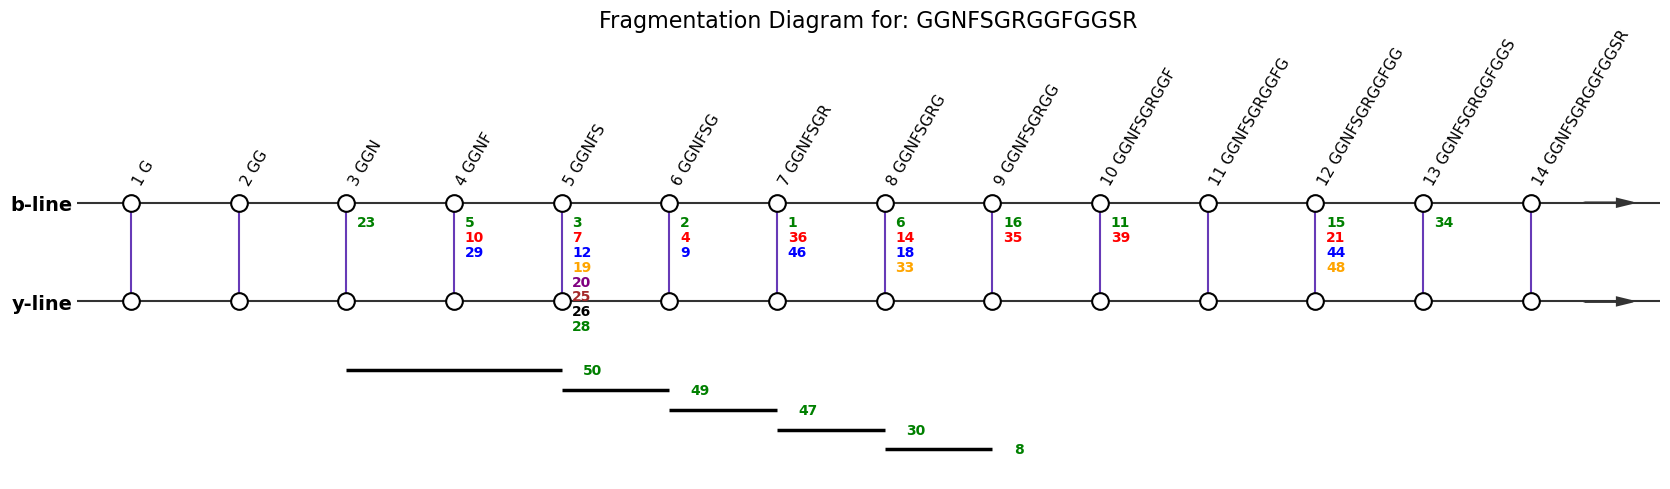

In [7]:
import matplotlib.pyplot as plt
import re

def parse_sequence(sequence):
    """
    Parses a peptide sequence that may contain modified residues.
    """
    residues = re.findall('[A-Z][a-z]*', sequence)
    return residues

def generate_b_ion_fragments(residues):
    """
    Generates a list of cumulative b-ion fragment sequences from the N-terminus.
    """
    fragments = []
    current_fragment = ""
    for residue in residues:
        current_fragment += residue
        fragments.append(current_fragment)
    return fragments

def plot_peptide_fragmentation(sequence, annotations=None, internal_peptides=None, show=True, save_path=None):
    """
    Generates and displays a visualization of peptide fragmentation.

    Args:
        sequence (str): The peptide sequence to visualize.
        annotations (list of lists, optional): Annotations for the vertical lines.
        internal_peptides (list of tuples, optional): Data for internal peptide lines.
                                                      Format: [(start, end, label), ...].
                                                      Defaults to None.
        show (bool): Whether to display the plot.
        save_path (str, optional): Path to save the figure.
    """
    residues = parse_sequence(sequence)
    b_ion_fragments = generate_b_ion_fragments(residues)
    num_fragments = len(residues)

    annotation_colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown', 'black']

    fig, ax = plt.subplots(figsize=(max(12, num_fragments * 1.2), 5))
    y_b_line = 1.0
    y_y_line = 0.0
    line_color = '#333333'
    line_width = 1.5

    ax.axhline(y=y_b_line, color=line_color, lw=line_width, zorder=1)
    ax.axhline(y=y_y_line, color=line_color, lw=line_width, zorder=1)
    arrow_length = 0.3
    ax.arrow(num_fragments + 0.5, y_b_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)
    ax.arrow(num_fragments + 0.5, y_y_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)

    for i, fragment in enumerate(b_ion_fragments):
        x_pos = i + 1
        ax.plot([x_pos, x_pos], [y_y_line, y_b_line], color='#673ab7', lw=1.5, zorder=2)
        ax.plot(x_pos, y_b_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        ax.plot(x_pos, y_y_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        label_text = f"{i+1} {fragment}"
        ax.text(x_pos, y_b_line + 0.15, label_text, ha='left', va='bottom', rotation=60, fontsize=11)

        if annotations and i < len(annotations) and annotations[i]:
            y_text_start = y_b_line - 0.2
            y_text_step = 0.15
            for j, annotation_val in enumerate(annotations[i]):
                color = annotation_colors[j % len(annotation_colors)]
                y_text = y_text_start - (j * y_text_step)
                ax.text(x_pos + 0.1, y_text, str(annotation_val), ha='left', va='center', color=color, fontsize=10, fontweight='bold')

    if internal_peptides:
        # --- MODIFIED: Adjusted starting position and step for internal lines ---
        y_internal_start = -0.7 # Moved further down
        y_internal_step = -0.2  # Increased spacing between lines

        for i, (start, end, label) in enumerate(internal_peptides):
            y_pos = y_internal_start + (i * y_internal_step)
            ax.plot([start, end], [y_pos, y_pos], color='black', linewidth=2.5, solid_capstyle='butt')
            ax.text(end + 0.2, y_pos, str(label), ha='left', va='center', color='green', fontsize=10, fontweight='bold')

    ax.set_xlim(0.5, num_fragments + 1.2)
    # --- MODIFIED: Further adjusted y-limit to ensure all lines are visible ---
    ax.set_ylim(-1.8, 2.5) # Extended further down
    ax.set_yticks([y_y_line, y_b_line])
    ax.set_yticklabels(['y-line', 'b-line'], fontsize=14, fontweight='bold')
    ax.set_xticks([])
    for spine in ['top', 'right', 'bottom', 'left']:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis='y', length=0)
    plt.title(f'Fragmentation Diagram for: {sequence}', fontsize=16, pad=20)
    plt.tight_layout()

    if show:
        plt.show()

    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

if __name__ == '__main__':
    peptide_sequence = "GGNFSGRGGFGGSR"

    custom_annotations = [
        [], [], [23], [5, 10, 29], [3, 7, 12, 19, 20, 25, 26, 28],
        [2, 4, 9], [1, 36, 46], [6, 14, 18, 33], [16, 35], [11, 39],
        [], [15, 21, 44, 48], [34], []
    ]

    internal_lines_data = [
        (3, 5, 50),
        (5, 6, 49),
        (6, 7, 47),
        (7, 8, 30),
        (8, 9, 8)
    ]

    plot_peptide_fragmentation(
        peptide_sequence,
        annotations=custom_annotations,
        internal_peptides=internal_lines_data
    )

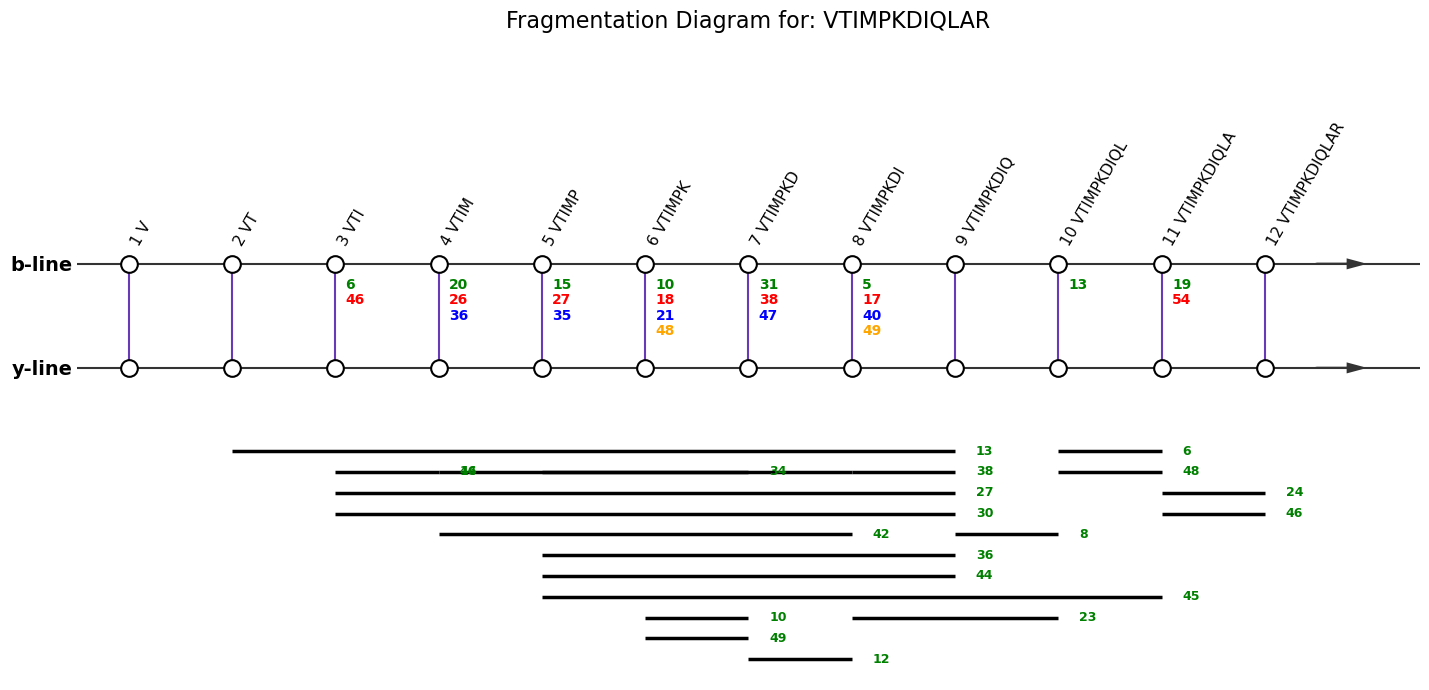

In [8]:
import matplotlib.pyplot as plt
import re

def parse_sequence(sequence):
    """
    Parses a peptide sequence that may contain modified residues.
    """
    residues = re.findall('[A-Z][a-z]*', sequence)
    return residues

def generate_b_ion_fragments(residues):
    """
    Generates a list of cumulative b-ion fragment sequences from the N-terminus.
    """
    fragments = []
    current_fragment = ""
    for residue in residues:
        current_fragment += residue
        fragments.append(current_fragment)
    return fragments

def plot_peptide_fragmentation(sequence, annotations=None, internal_peptides=None, show=True, save_path=None):
    """
    Generates and displays a visualization of peptide fragmentation with improved
    layout for internal peptide annotations.

    Args:
        sequence (str): The peptide sequence to visualize.
        annotations (list of lists, optional): Annotations for the vertical lines.
        internal_peptides (list of tuples, optional): Data for internal peptide lines.
                                                      Format: [(start, end, label), ...].
        show (bool): Whether to display the plot.
        save_path (str, optional): Path to save the figure.
    """
    residues = parse_sequence(sequence)
    b_ion_fragments = generate_b_ion_fragments(residues)
    num_fragments = len(residues)

    annotation_colors = ['green', 'red', 'blue', 'orange', 'purple', 'brown', 'black']

    # --- MODIFIED: Increased figure height for more vertical space ---
    fig, ax = plt.subplots(figsize=(max(12, num_fragments * 1.2), 7))
    y_b_line = 1.0
    y_y_line = 0.0
    line_color = '#333333'
    line_width = 1.5

    # --- Drawing main b/y lines and arrows (unchanged) ---
    ax.axhline(y=y_b_line, color=line_color, lw=line_width, zorder=1)
    ax.axhline(y=y_y_line, color=line_color, lw=line_width, zorder=1)
    arrow_length = 0.3
    ax.arrow(num_fragments + 0.5, y_b_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)
    ax.arrow(num_fragments + 0.5, y_y_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)

    # --- Drawing vertical fragment lines and annotations (unchanged) ---
    for i, fragment in enumerate(b_ion_fragments):
        x_pos = i + 1
        ax.plot([x_pos, x_pos], [y_y_line, y_b_line], color='#673ab7', lw=1.5, zorder=2)
        ax.plot(x_pos, y_b_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        ax.plot(x_pos, y_y_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        label_text = f"{i+1} {fragment}"
        ax.text(x_pos, y_b_line + 0.15, label_text, ha='left', va='bottom', rotation=60, fontsize=11)

        if annotations and i < len(annotations) and annotations[i]:
            y_text_start = y_b_line - 0.2
            y_text_step = 0.15
            for j, annotation_val in enumerate(annotations[i]):
                color = annotation_colors[j % len(annotation_colors)]
                y_text = y_text_start - (j * y_text_step)
                ax.text(x_pos + 0.1, y_text, str(annotation_val), ha='left', va='center', color=color, fontsize=10, fontweight='bold')

    # --- NEW: Improved logic for plotting internal peptides ---
    if internal_peptides:
        y_internal_start = -0.5  # Starting y-position for the first lane
        y_internal_step = -0.2   # Vertical distance between lanes
        
        # Tracks the ending x-coordinate of the last peptide in each lane.
        # Initialize with a low value. Max 20 lanes supported.
        lane_ends = [-1.0] * 20

        # Sort peptides by start position, then by length, for better packing
        sorted_peptides = sorted(internal_peptides, key=lambda p: (p[0], p[1] - p[0]))

        for start, end, label in sorted_peptides:
            placed = False
            # Find the first available lane where the new peptide doesn't overlap
            for i in range(len(lane_ends)):
                # Check for space (add a small 0.5 gap for clarity)
                if start > lane_ends[i] + 0.5:
                    y_pos = y_internal_start + (i * y_internal_step - 0.3)
                    
                    # Draw the horizontal line for the internal peptide
                    ax.plot([start, end], [y_pos, y_pos], color='black', linewidth=2.5, solid_capstyle='butt')
                    
                    # Add the label number at the end of the line
                    ax.text(end + 0.2, y_pos, str(label), ha='left', va='center', color='green', fontsize=9, fontweight='bold')
                    
                    # Update the end position for this lane
                    lane_ends[i] = float(end)
                    placed = True
                    break
            
            if not placed:
                print(f"Warning: Could not place internal peptide {label} ({start}-{end}). Consider increasing max lanes.")

    # --- MODIFIED: Adjust plot limits and appearance ---
    ax.set_xlim(0.5, num_fragments + 1.5)
    ax.set_ylim(-3.0, 3.0) # Expanded y-limits
    ax.set_yticks([y_y_line, y_b_line])
    ax.set_yticklabels(['y-line', 'b-line'], fontsize=14, fontweight='bold')
    ax.set_xticks([])
    for spine in ['top', 'right', 'bottom', 'left']:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis='y', length=0)
    plt.title(f'Fragmentation Diagram for: {sequence}', fontsize=16, pad=20)
    plt.tight_layout()

    if show:
        plt.show()

    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')


# --- Example Usage (using data from your image) ---
if __name__ == '__main__':
    peptide_sequence = "VTIMPKDIQLAR"

    # Annotations for the vertical b/y lines
    custom_annotations = [
        [], [], ['6', '46'], ['20', '26', '36'], ['15', '27', '35'], ['10', '18', '21', '48'],
        ['31', '38', '47'], ['5', '17', '40', '49'], [], ['13'], ['19', '54'], []
    ]

    # Internal peptide data: list of (start_residue, end_residue, label)
    # I've estimated these from your provided image
    '''
    internal_peptides_data = [
        (5, 7, '2'), (5, 10, '4'), (5, 9, '7'), (5, 11, '11'),
        (5, 12, '16'), (6, 12, '23'), (6, 11, '25'), (7, 8, '28'),
        (7, 10, '29'), (8, 11, '30'), (10, 12, '32'), (9, 10, '34'),
        (9, 11, '37'), (8, 10, '40'), (8, 9, '47'), (4, 5, '51'),
        (11, 12, '52'), (10, 11, '56'), (11, 12, '39') # Added 39
    ]
    '''

    
    internal_peptides_data = [(10, 11, 6), (9, 10, 8), (6, 7, 10), (7, 8, 12), (2, 9, 13), (8, 4, 16), (8, 10, 23), (11, 12, 24), (3, 9, 27), (3, 9, 30), (5, 7, 34), (5, 9, 36), (8, 9, 38), (4, 8, 42), (5, 9, 44), (3, 4, 44), (5, 11, 45), (11, 12, 46), (10, 11, 48), (6, 7, 49)]
    plot_peptide_fragmentation(
        peptide_sequence,
        annotations=custom_annotations,
        internal_peptides=internal_peptides_data
    )

In [9]:
pd.read_csv('data/cluster/data_cluster7.csv', index_col=0)

,Cluster ID,Cluster Size,Median Mass (Da),Difference from Actual Mass (Da)
0,0,8,1253.215,-0.27328
1,1,4,1155.270,-98.21828
2,2,8,1235.365,-18.12328
3,3,2,1217.560,-35.92828
4,4,4,1137.625,-115.86328
5,5,2,1216.720,-36.76828


In [5]:
import peptide
the_pep = peptide.Pep('[GGNFSGRMeGGFGGSR+2H]2+')
the_pep.seq

'GGNFSGRGGFGGSR'

In [1]:
import interpreter

In [12]:
pep_list = list(the_pep.seq)
peptide_mass_list = [interpreter.define[i] for i in pep_list]

In [ ]:
sequence_pairs = interpreter.all_pairs('GGNFSGR(Me)GGFGGSR',2,peptide_mass_list)

In [9]:
import interpreter_modify
import pandas as pd

In [10]:
df = pd.read_csv('data/data_table/data_sheet4.csv')
df_mass = df[['mass1', 'mass2']]
df_mass_clean = df_mass.dropna()
df_mass_clean.columns = ['m/z A', 'm/z B']
df_mass_clean.head()


,m/z A,m/z B
0,560.40,387.05
1,445.29,617.14
2,323.67,860.17
3,633.88,239.74
4,1553.17,452.35


In [1]:
import pandas as pd
import interpreter
import interpreter_modify

In [6]:
df = pd.read_csv('data/data_table/data_sheet4.csv')
df_mass = df[['each_original_data', 'mass1', 'mass2']]
df_mass_clean = df_mass.dropna()
df_mass_clean.columns = ['each_original_data', 'm/z A', 'm/z B']
df_mass_clean.head()

,each_original_data,m/z A,m/z B
0,y8(2+) @ 560.4 & [b3-NH3] (1+) @ 387.05,560.40,387.05
1,y6(2+) @ 445.29 & [b5-NH3] (1+) @ 617.14,445.29,617.14
2,y5(2+) @ 323.67 & [b6-NH3] (1+) @ 860.17,323.67,860.17
3,y9(2+) @ 633.88 & [b2-NH3] (1+) @ 239.74,633.88,239.74
4,bi5-8 (1+) @ 1553.17 & y3 (1+) @ 452.35,1553.17,452.35


In [5]:
df.columns

Index(['Unnamed: 0', 'each_original_data', 'ion1', 'loss1', 'loss_sign1',
       'charge1', 'mass1', 'ion2', 'loss2', 'loss_sign2', 'charge2', 'mass2',
       'addition_mass1', 'addition_mass2', 'ion_mass1', 'ion_mass2',
       'correct_mass1', 'correct_mass2', 'mass_difference1',
       'mass_difference2', 'm1+m2', '2m1+m2', 'm1+2m2', 'chosen_sum_from',
       'chosen_sum'],
      dtype='object')

In [14]:
input = 'EQFDDY(p)GHMRF(NH2)'
peptide_input = interpreter_modify.adjust_peptide(input)
peptide_list = list(peptide_input[0])
peptide = []
for item in peptide_list:
    peptide.append(interpreter.define[item])
sequence_pairs = interpreter_modify.all_pairs(peptide_input[0],peptide_input[1],3,peptide)


In [15]:
df_result = interpreter_modify.report_from_dataframe(df_mass_clean, sequence_pairs, tolerance=0.8)

In [21]:
df_result = interpreter_modify.report_data(df_mass_clean, 'EQFDDY(p)GHMRF(NH2)', 3, tolerance_input=1)
df_result

,Index,Interpretation A,m/z A,m/z B,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation
0,1,y8-(NH3)(2+),551.20,387.05,b3-(H2O)(1+),1.0,1.0,0.12
1,2,bi(4-8)-2(NH3)(1+),634.11,194.76,b3-(NH3)(2+),1.0,1.0,0.182
2,3,bi(5-8)-2(NH3)(1+),518.97,454.06,b4-2(H2O)-(HCOH)(1+),1.0,1.0,0.186
3,4,ai(4-8)-(HPO3)(1+),560.27,358.97,b3-(HCOOH)(1+),1.0,1.0,0.204
4,,ai(4-8)-(HPO3)(1+),560.27,358.97,a3-(H2O)(1+),1.0,1.0,0.204
...,...,...,...,...,...,...,...,...
114,90,,646.41,312.22,,1.0,1.0,
115,91,,634.11,222.72,,1.0,1.0,
116,92,,683.85,263.10,,1.0,1.0,
117,93,,591.11,398.48,,1.0,1.0,


In [22]:
df_mass_clean

,each_original_data,m/z A,m/z B
0,y8(2+) @ 560.4 & [b3-NH3] (1+) @ 387.05,560.40,387.05
1,y6(2+) @ 445.29 & [b5-NH3] (1+) @ 617.14,445.29,617.14
2,y5(2+) @ 323.67 & [b6-NH3] (1+) @ 860.17,323.67,860.17
3,y9(2+) @ 633.88 & [b2-NH3] (1+) @ 239.74,633.88,239.74
4,bi5-8 (1+) @ 1553.17 & y3 (1+) @ 452.35,1553.17,452.35
5,bi5-9 (1+) @ 684.16 & y2 (1+) @ 321.1,684.16,321.10
6,y6(2+) @ 445.35 & a3(1+) @ 378.1,445.35,378.10
7,y5+ @ 646.41 & bi5-6 (1+) @ 359.02,646.41,359.02
8,503.73 & 498.42,503.73,498.42
9,[b5-H2O-NH3] (1+) @ 599.96 & y6 (2+) @ 445.31,599.96,445.31


In [23]:
merged = pd.merge(df_mass_clean, df_result, on=['m/z A', 'm/z B'], how='outer')

In [24]:
merged.head(30)

,each_original_data,m/z A,m/z B,Index,Interpretation A,Interpretation B,CorrelationScore,NormalisedScore,MassDeviation
0,y1(1+) @ 164.91 & [b10-NH3](2+) @ 671.48,164.91,671.48,9,b3-(HCOOH)-(HCOH)(2+),bi(4-9)-(CH3SH)-(HPO3)(1+),1.0,1.0,0.27
1,y1(1+) @ 164.91 & [b10-NH3](2+) @ 671.48,164.91,671.48,,a3-(H2O)-(HCOH)(2+),bi(4-9)-(CH3SH)-(HPO3)(1+),1.0,1.0,0.27
2,y1(1+) @ 164.91 & [b10-NH3](2+) @ 671.48,164.91,671.48,40,a3-(NH3)-(HCOH)(2+),bi(4-9)-(CH3SH)-(HPO3)(1+),1.0,1.0,0.693
3,y1(1+) @ 164.91 & [b10-NH3](2+) @ 671.48,164.91,671.48,59,y1(1+),b10-(H2O)(2+),1.0,1.0,0.852
4,y1(1+) @ 164.91 & [b10-NH3](2+) @ 671.48,164.91,671.48,,y1(1+),b10-(NH3)(2+),1.0,1.0,0.86
5,y4(2+) @ 294.78 & [b7-NH3](1+) @ 917.61,294.78,917.61,11,y4(2+),b7-(H2O)(1+),1.0,1.0,0.361
6,y4(2+) @ 294.78 & [b7-NH3](1+) @ 917.61,294.78,917.61,35,y4(2+),b7-(NH3)(1+),1.0,1.0,0.661
7,y5(2+) @ 323.67 & [b6-NH3] (1+) @ 860.17,323.67,860.17,18,y5(2+),b6-(H2O)(1+),1.0,1.0,0.506
8,y5 (2+) @ 323.7 & [a6-NH3] (1+) @ 832.58,323.70,832.58,30,y5(2+),b6-(HCOOH)(1+),1.0,1.0,0.619
9,y5 (2+) @ 323.7 & [a6-NH3] (1+) @ 832.58,323.70,832.58,,y5(2+),a6-(H2O)(1+),1.0,1.0,0.624


In [92]:
import peptide

In [137]:
pep = peptide.Pep('[GGNFSGR(Me)GGFGGSR+2H]2+')

In [94]:
pep.AA_array[6].get_mass()

170.11676

In [95]:
import pandas as pd
df = pd.read_csv('data/data_table/data_sheet1.csv')

In [96]:
df['loss1'] = df['loss1'].str.replace(' ', '', regex=False)
df['loss2'] = df['loss2'].str.replace(' ', '', regex=False)

In [97]:
loss_list = list(df['loss1']) + list(df['loss2'])
loss_set = set(loss_list)
loss_include = []
for i in loss_set:
    if loss_list.count(i) >=2:
        loss_include.append(i)

for i in range(len(loss_include)):
    if type(loss_include[i]) == float:
        loss_include[i] = 'No Loss'
loss_include
        


['No Loss',
 'CH3-NH2',
 'H2O-NH3',
 'CH3NH2-NH3',
 'HN=C=N-CH3',
 'NH3',
 'NH3-H2O',
 'CH3NH2',
 'HN=C=NH-2(H2O)',
 'H2O']

In [98]:
pep_len = len(pep.AA_array)
#ion_list = [f'b{i}' for i in range(1, pep_len+1)] + [f'y{i}' for i in range(pep_len, 0, -1)]
ion_list = [f'b{i}' for i in range(1, pep_len+1)]
ion_list

['b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b10',
 'b11',
 'b12',
 'b13',
 'b14']

In [99]:
df_generate = pd.DataFrame(columns=ion_list, index = loss_include)
df_generate

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14
No Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH3-NH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2O-NH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH3NH2-NH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HN=C=N-CH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NH3-H2O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH3NH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HN=C=NH-2(H2O),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df['loss1_m'] = df['loss1'].fillna('No Loss')
df['loss2_m'] = df['loss2'].fillna('No Loss')


In [124]:
df.columns

Index(['Unnamed: 0', 'each_original_data', 'ion1', 'loss1', 'loss_sign1',
       'charge1', 'mass1', 'ion2', 'loss2', 'loss_sign2', 'charge2', 'mass2',
       'addition_mass1', 'addition_mass2', 'ion_mass1', 'ion_mass2',
       'correct_mass1', 'correct_mass2', 'mass_difference1',
       'mass_difference2', 'm1+m2', '2m1+m2', 'm1+2m2', 'chosen_sum_from',
       'chosen_sum', 'loss1_m', 'loss2_m'],
      dtype='object')

In [131]:
for index, each_row in df.iterrows():
    if each_row['ion1'] in df_generate.columns and each_row['loss1_m'] in df_generate.index and type(each_row['charge2']) is str and type(each_row['charge1']) is str:
        if each_row['loss1_m'] != 'No Loss':
            df_generate.at[each_row['loss1_m'], each_row['ion1']] = each_row['ion1'] + \
            '+' + each_row['loss1_m'] + f' ({round(each_row["mass_difference1"], 2)})' + \
            f' ({each_row["charge1"].replace("+", "")}' + ' ,' + \
            f' {each_row["charge2"].replace("+", "")})'
        else: 
            df_generate.at[each_row['loss1_m'], each_row['ion1']] = each_row['ion1'] + \
            f' ({round(each_row["mass_difference1"], 2)})' + \
            f' ({each_row["charge1"].replace("+", "")}' + ' ,' + \
            f' {each_row["charge2"].replace("+", "")})'
            
df_generate

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14
No Loss,NaN,NaN,b3,NaN,b5,NaN,"b7 (1.0) (1 , 1)",b8,"b9 (-0.04) (1 , 1)","b10 (0.62) (1 , 1)","b11 (0.16) (1 , 1)","b12 (0.29) (1 , 1)",NaN,NaN
CH3-NH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"b9+CH3-NH2 (-0.2) (1 , 1)",NaN,NaN,NaN,NaN,NaN
H2O-NH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH3NH2-NH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"b8+CH3NH2-NH3 (0.12) (1 , 1)","b9+CH3NH2-NH3 (-0.61) (1 , 1)",NaN,NaN,NaN,NaN,NaN
HN=C=N-CH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NH3,NaN,NaN,NaN,b4+NH3,b5+NH3,b6+NH3,b7+NH3,b8+NH3,NaN,NaN,b11+NH3,NaN,NaN,NaN
NH3-H2O,NaN,NaN,NaN,NaN,b5+NH3-H2O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH3NH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HN=C=NH-2(H2O),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"b8+H2O (0.4) (1 , 1)",b9+H2O (-0.04) (1),NaN,NaN,NaN,NaN,NaN


In [132]:
for index, each_row in df.iterrows():
    if each_row['ion2'] in df_generate.columns and each_row['loss2_m'] in df_generate.index and type(each_row['charge2']) is str and type(each_row['charge1']) is str:
        if each_row['loss2_m'] != 'No Loss':
            df_generate.at[each_row['loss2_m'], each_row['ion2']] = each_row['ion2'] + \
            '+' + each_row['loss2_m'] + f' ({round(each_row["mass_difference2"], 2)})' + \
            f' ({each_row["charge2"].replace("+", "")}' + ' ,' + \
            f' {each_row["charge1"].replace("+", "")})'
        else: 
            df_generate.at[each_row['loss2_m'], each_row['ion2']] = each_row['ion2'] + \
            f' ({round(each_row["mass_difference2"], 2)})' + \
            f' ({each_row["charge2"].replace("+", "")}' + ' ,' + \
            f' {each_row["charge1"].replace("+", "")})'
df_generate

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14
No Loss,NaN,NaN,"b3 (-0.43) (1 , 1)",NaN,"b5 (0.21) (1 , 1)",NaN,"b7 (0.03) (1 , 1)","b8 (0.42) (1 , 1)","b9 (0.13) (1 , 1)","b10 (-0.31) (1 , 1)","b11 (0.12) (1 , 1)","b12 (0.29) (1 , 1)",NaN,NaN
CH3-NH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"b9+CH3-NH2 (-0.2) (1 , 1)",NaN,NaN,NaN,NaN,NaN
H2O-NH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH3NH2-NH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"b8+CH3NH2-NH3 (0.12) (1 , 1)","b9+CH3NH2-NH3 (-0.61) (1 , 1)",NaN,NaN,NaN,NaN,NaN
HN=C=N-CH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NH3,NaN,NaN,NaN,"b4+NH3 (0.14) (1 , 1)","b5+NH3 (-0.78) (1 , 1)","b6+NH3 (-0.04) (1 , 1)","b7+NH3 (0.48) (1 , 1)","b8+NH3 (0.02) (1 , 1)",NaN,NaN,"b11+NH3 (0.58) (1 , 1)",NaN,NaN,NaN
NH3-H2O,NaN,NaN,NaN,NaN,"b5+NH3-H2O (-0.06) (1 , 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH3NH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HN=C=NH-2(H2O),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"b8+H2O (0.4) (1 , 1)",b9+H2O (-0.04) (1),NaN,NaN,NaN,NaN,NaN


In [106]:
df_generate

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14
No Loss,NaN,NaN,b3,NaN,b5,NaN,b7,b8,b9,b10,b11,b12,NaN,NaN
CH3-NH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b9+CH3-NH2,NaN,NaN,NaN,NaN,NaN
H2O-NH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH3NH2-NH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b8+CH3NH2-NH3,b9+CH3NH2-NH3,NaN,NaN,NaN,NaN,NaN
HN=C=N-CH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NH3,NaN,NaN,NaN,b4+NH3,b5+NH3,b6+NH3,b7+NH3,b8+NH3,NaN,NaN,b11+NH3,NaN,NaN,NaN
NH3-H2O,NaN,NaN,NaN,NaN,b5+NH3-H2O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH3NH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HN=C=NH-2(H2O),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b8+H2O,b9+H2O,NaN,NaN,NaN,NaN,NaN


In [156]:
import re


In [262]:
def ion_data_organizer_d(df, seq):
    df['loss1'] = df['loss1'].str.replace(' ', '', regex=False)
    df['loss2'] = df['loss2'].str.replace(' ', '', regex=False)
    loss_list = list(df['loss1']) + list(df['loss2'])
    loss_set = set(loss_list)
    loss_include = []
    for i in loss_set:
        if loss_list.count(i) >=2:
            loss_include.append(i)

    for i in range(len(loss_include)):
        if type(loss_include[i]) == float:
            loss_include[i] = 'No Loss'
    df['loss1_m'] = df['loss1'].fillna('No Loss')
    df['loss2_m'] = df['loss2'].fillna('No Loss')
    pep = peptide.Pep(seq)
    pep_len = len(pep.AA_array)
    ion_list = [f'b{i}' for i in range(1, pep_len+1)]
    df_generate = pd.DataFrame(columns=ion_list, index = loss_include)
    
    for index, each_row in df.iterrows():
        #if each_row['ion1'] in df_generate.columns and each_row['loss1_m'] in df_generate.index and type(each_row['charge2']) is str and type(each_row['charge1']) is str:
        if (
                
                each_row['loss1_m'] in df_generate.index
                and isinstance(each_row['charge1'], str)
                and isinstance(each_row['charge2'], str)
                and (
                    each_row['ion1'] in df_generate.columns or
                    re.match(r'^a\d+(-[A-Za-z0-9]+)?$', each_row['ion1'])
                )
            ):
            
            if each_row['loss1_m'] != 'No Loss':
                df_generate.at[each_row['loss1_m'], each_row['ion1'].replace('a', 'b')] = each_row['ion1'] + \
                '-' + each_row['loss1_m'] + f' ({round(each_row["mass_difference1"], 2)})' + \
                f' ({each_row["charge1"].replace("+", "")}' + ' ,' + \
                f' {each_row["charge2"].replace("+", "")})'
            else: 
                df_generate.at[each_row['loss1_m'], each_row['ion1'].replace('a', 'b')] = each_row['ion1'] + \
                f' ({round(each_row["mass_difference1"], 2)})' + \
                f' ({each_row["charge1"].replace("+", "")}' + ' ,' + \
                f' {each_row["charge2"].replace("+", "")})'
    
    for index, each_row in df.iterrows():
        #if each_row['ion2'] in df_generate.columns and each_row['loss2_m'] in df_generate.index and type(each_row['charge2']) is str and type(each_row['charge1']) is str:
        if (
                each_row['loss2_m'] in df_generate.index
                and isinstance(each_row['charge1'], str)
                and isinstance(each_row['charge2'], str)
                and   (
                    each_row['ion2'] in df_generate.columns or
                    re.match(r'^a\d+(-[A-Za-z0-9]+)?$', each_row['ion2'])
                )
            ):
            if each_row['loss2_m'] != 'No Loss':
                df_generate.at[each_row['loss2_m'], each_row['ion2'].replace('a', 'b')] = each_row['ion2'] + \
                '-' + each_row['loss2_m'] + f' ({round(each_row["mass_difference2"], 2)})' + \
                f' ({each_row["charge2"].replace("+", "")}' + ' ,' + \
                f' {each_row["charge1"].replace("+", "")})'
            else: 
                df_generate.at[each_row['loss2_m'], each_row['ion2'].replace('a', 'b')] = each_row['ion2'] + \
                f' ({round(each_row["mass_difference2"], 2)})' + \
                f' ({each_row["charge2"].replace("+", "")}' + ' ,' + \
                f' {each_row["charge1"].replace("+", "")})'
    df_generate = df_generate.dropna(axis=1, how='all')
    df_generate = df_generate.dropna(axis=0, how='all')
    return df_generate
    

In [261]:
'aa'.replace('a', 'b')

'bb'

In [174]:
'[GGNFSGR(Me)GGFGGSR+2H]2+]'
df = pd.read_csv('data/data_table/data_sheet1.csv')
ion_data_organizer_d(df, '[GGNFSGR(Me)GGFGGSR+2H]2+')

,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,a10,a4,a8,a5,a11
No Loss,"b3 (-0.43) (1 , 1)",NaN,"b5 (0.21) (1 , 1)",NaN,"b7 (0.03) (1 , 1)","b8 (0.42) (1 , 1)","b9 (0.13) (1 , 1)","b10 (-0.31) (1 , 1)","b11 (0.12) (1 , 1)","b12 (0.29) (1 , 1)","a10 (0.77) (1 , 1)","a4 (-0.34) (1 , 1)","a8 (0.12) (1 , 1)",NaN,NaN
CH3-NH2,NaN,NaN,NaN,NaN,NaN,NaN,"b9+CH3-NH2 (-0.2) (1 , 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH3NH2-NH3,NaN,NaN,NaN,NaN,NaN,"b8+CH3NH2-NH3 (0.12) (1 , 1)","b9+CH3NH2-NH3 (-0.61) (1 , 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NH3,NaN,"b4+NH3 (0.14) (1 , 1)","b5+NH3 (-0.78) (1 , 1)","b6+NH3 (-0.04) (1 , 1)","b7+NH3 (0.48) (1 , 1)","b8+NH3 (0.02) (1 , 1)",NaN,NaN,"b11+NH3 (0.58) (1 , 1)",NaN,NaN,"a4+NH3 (-0.43) (1 , 1)",NaN,"a5+NH3 (-0.06) (1 , 1)","a11+NH3 (-0.41) (1 , 1)"
NH3-H2O,NaN,NaN,"b5+NH3-H2O (-0.06) (1 , 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"a5+NH3-H2O (0.03) (1 , 1)",NaN
H2O,NaN,NaN,NaN,NaN,NaN,"b8+H2O (0.4) (1 , 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
peptide.Pep('[GGNFSGR(Me)GGFGGSR+2H]2+')

In [245]:
def ion_data_organizer_y(df, seq):
    df['loss1'] = df['loss1'].str.replace(' ', '', regex=False)
    df['loss2'] = df['loss2'].str.replace(' ', '', regex=False)
    loss_list = list(df['loss1']) + list(df['loss2'])
    loss_set = set(loss_list)
    loss_include = []
    for i in loss_set:
        if loss_list.count(i) >=2:
            loss_include.append(i)

    for i in range(len(loss_include)):
        if type(loss_include[i]) == float:
            loss_include[i] = 'No Loss'
    df['loss1_m'] = df['loss1'].fillna('No Loss')
    df['loss2_m'] = df['loss2'].fillna('No Loss')
    pep = peptide.Pep(seq)
    pep_len = len(pep.AA_array)
    ion_list = [f'y{i}' for i in range(1, pep_len+1)]
    df_generate = pd.DataFrame(columns=ion_list, index = loss_include)
    
    for index, each_row in df.iterrows():
        if each_row['ion1'] in df_generate.columns and each_row['loss1_m'] in df_generate.index and type(each_row['charge2']) is str and type(each_row['charge1']) is str:
            
            if each_row['loss1_m'] != 'No Loss':
                df_generate.at[each_row['loss1_m'], each_row['ion1']] = each_row['ion1'] + \
                '-' + each_row['loss1_m'] + f' ({round(each_row["mass_difference1"], 2)})' + \
                f' ({each_row["charge1"].replace("+", "")}' + ' ,' + \
                f' {each_row["charge2"].replace("+", "")})'
            else: 
                df_generate.at[each_row['loss1_m'], each_row['ion1']] = each_row['ion1'] + \
                f' ({round(each_row["mass_difference1"], 2)})' + \
                f' ({each_row["charge1"].replace("+", "")}' + ' ,' + \
                f' {each_row["charge2"].replace("+", "")})'
    
    for index, each_row in df.iterrows():
        if each_row['ion2'] in df_generate.columns and each_row['loss2_m'] in df_generate.index and type(each_row['charge2']) is str and type(each_row['charge1']) is str:

            if each_row['loss2_m'] != 'No Loss':
                df_generate.at[each_row['loss2_m'], each_row['ion2']] = each_row['ion2'] + \
                '-' + each_row['loss2_m'] + f' ({round(each_row["mass_difference2"], 2)})' + \
                f' ({each_row["charge2"].replace("+", "")}' + ' ,' + \
                f' {each_row["charge1"].replace("+", "")})'
            else: 
                df_generate.at[each_row['loss2_m'], each_row['ion2']] = each_row['ion2'] + \
                f' ({round(each_row["mass_difference2"], 2)})' + \
                f' ({each_row["charge2"].replace("+", "")}' + ' ,' + \
                f' {each_row["charge1"].replace("+", "")})'
    df_generate = df_generate.dropna(axis=1, how='all')
    df_generate = df_generate.dropna(axis=0, how='all')
    return df_generate

In [172]:
'[GGNFSGR(Me)GGFGGSR+2H]2+]'
df = pd.read_csv('data/data_table/data_sheet1.csv')
ion_data_organizer_y(df, '[GGNFSGR(Me)GGFGGSR+2H]2+')

,y2,y3,y4,y5,y6,y7,y8,y9,y10
No Loss,NaN,"y3 (-0.32) (1 , 1)",NaN,"y5 (-0.01) (1 , 1)","y6 (0.31) (1 , 1)","y7 (0.29) (1 , 1)",NaN,NaN,NaN
CH3-NH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"y9+CH3-NH2 (-0.3) (1 , 1)",NaN
H2O-NH3,"y2+H2O-NH3 (-0.31) (1 , 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH3NH2-NH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"y9+CH3NH2-NH3 (0.47) (1 , 1)",NaN
HN=C=N-CH3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"y10+HN=C=N-CH3 (-0.04) (1 , 1)"
NH3,NaN,"y3+NH3 (-0.09) (1 , 1)","y4+NH3 (-0.06) (1 , 1)","y5+NH3 (-0.15) (1 , 1)","y6+NH3 (-0.39) (1 , 1)","y7+NH3 (-0.13) (1 , 1)","y8+NH3 (0.02) (1 , 1)","y9+NH3 (0.37) (1 , 1)","y10+NH3 (0.07) (1 , 1)"
CH3NH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"y9+CH3NH2 (0.2) (1 , 1)",NaN
HN=C=NH-2(H2O),NaN,"y3+HN=C=NH-2(H2O) (-0.34) (1 , 1)","y4+HN=C=NH-2(H2O) (-0.69) (1 , 1)",NaN,NaN,NaN,NaN,NaN,NaN
H2O,NaN,NaN,NaN,NaN,"y6+H2O (0.08) (1 , 1)","y7+H2O (-0.3) (1 , 1)",NaN,NaN,NaN


In [175]:
import matplotlib.pyplot as plt
import re

def parse_sequence(sequence):
    """
    Parses a peptide sequence that may contain modified residues.
    """
    residues = re.findall('[A-Z][a-z]*', sequence)
    return residues

def generate_b_ion_fragments(residues):
    """
    Generates a list of cumulative b-ion fragment sequences from the N-terminus.
    """
    fragments = []
    current_fragment = ""
    for residue in residues:
        current_fragment += residue
        fragments.append(current_fragment)
    return fragments

def plot_peptide_fragmentation(sequence, annotations=None, internal_peptides=None, 
                               neutral_loss_map=None, default_color='black', 
                               show=True, save_path=None):
    """
    Generates and displays a visualization of peptide fragmentation.

    Args:
        sequence (str): The peptide sequence to visualize.
        annotations (list of lists of tuples, optional): 
            Annotations for the vertical lines. 
            Format: [[(label, loss_type), ...], ...]
        internal_peptides (list of tuples, optional): Data for internal peptide lines.
                                                      Format: [(start, end, label), ...].
        neutral_loss_map (dict, optional): A dictionary mapping neutral loss types to colors.
                                           e.g., {'H2O': 'blue', 'NH3': 'red'}.
        default_color (str, optional): Color for annotations whose type is not in the map.
        show (bool): Whether to display the plot.
        save_path (str, optional): Path to save the figure.
    """
    residues = parse_sequence(sequence)
    b_ion_fragments = generate_b_ion_fragments(residues)
    num_fragments = len(residues)

    fig, ax = plt.subplots(figsize=(max(12, num_fragments * 1.2), 7))
    y_b_line, y_y_line = 1.0, 0.0
    line_color = '#333333'
    line_width = 1.5

    # Drawing main b/y lines and arrows
    ax.axhline(y=y_b_line, color=line_color, lw=line_width, zorder=1)
    ax.axhline(y=y_y_line, color=line_color, lw=line_width, zorder=1)
    arrow_length = 0.3
    ax.arrow(num_fragments + 0.5, y_b_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)
    ax.arrow(num_fragments + 0.5, y_y_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)

    # Drawing vertical fragment lines and annotations
    for i, fragment in enumerate(b_ion_fragments):
        x_pos = i + 1
        ax.plot([x_pos, x_pos], [y_y_line, y_b_line], color='#673ab7', lw=1.5, zorder=2)
        ax.plot(x_pos, y_b_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        ax.plot(x_pos, y_y_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        label_text = f"{i+1} {fragment}"
        ax.text(x_pos, y_b_line + 0.15, label_text, ha='left', va='bottom', rotation=60, fontsize=11)

        # --- MODIFIED: Annotation coloring logic ---
        if annotations and i < len(annotations) and annotations[i]:
            y_text_start = y_b_line - 0.2
            y_text_step = 0.15
            for j, annotation_data in enumerate(annotations[i]):
                # Each annotation is now a tuple: (label, loss_type)
                label, loss_type = annotation_data
                
                # Determine the color from the map or use the default
                color = neutral_loss_map.get(loss_type, default_color) if neutral_loss_map else default_color

                y_text = y_text_start - (j * y_text_step)
                ax.text(x_pos + 0.1, y_text, str(label), ha='left', va='center', color=color, fontsize=10, fontweight='bold')
    
    # --- Logic for plotting internal peptides (unchanged) ---
    if internal_peptides:
        y_internal_start, y_internal_step = -0.5, -0.16
        lane_ends = [-1.0] * 20
        sorted_peptides = sorted(internal_peptides, key=lambda p: (p[0], p[1] - p[0]))
        for start, end, label in sorted_peptides:
            placed = False
            for lane_idx in range(len(lane_ends)):
                if start > lane_ends[lane_idx] + 0.5:
                    y_pos = y_internal_start + (lane_idx * y_internal_step)
                    ax.plot([start, end], [y_pos, y_pos], color='black', linewidth=2.5, solid_capstyle='butt')
                    ax.text(end + 0.2, y_pos, str(label), ha='left', va='center', color='green', fontsize=9, fontweight='bold')
                    lane_ends[lane_idx] = float(end)
                    placed = True
                    break
            if not placed:
                print(f"Warning: Could not place internal peptide {label} ({start}-{end}).")

    # Adjust plot limits and appearance
    ax.set_xlim(0.5, num_fragments + 1.5)
    ax.set_ylim(-3.0, 3.0)
    ax.set_yticks([y_y_line, y_b_line])
    ax.set_yticklabels(['y-line', 'b-line'], fontsize=14, fontweight='bold')
    ax.set_xticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='y', length=0)
    plt.title(f'Fragmentation Diagram for: {sequence}', fontsize=16, pad=20)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    if show:
        plt.show()
    plt.close() # Add this to free up memory after saving/showing

[(7, 8, 8), (3, 4, 23), (6, 7, 30), (5, 6, 47), (4, 5, 49), (2, 4, 50)]


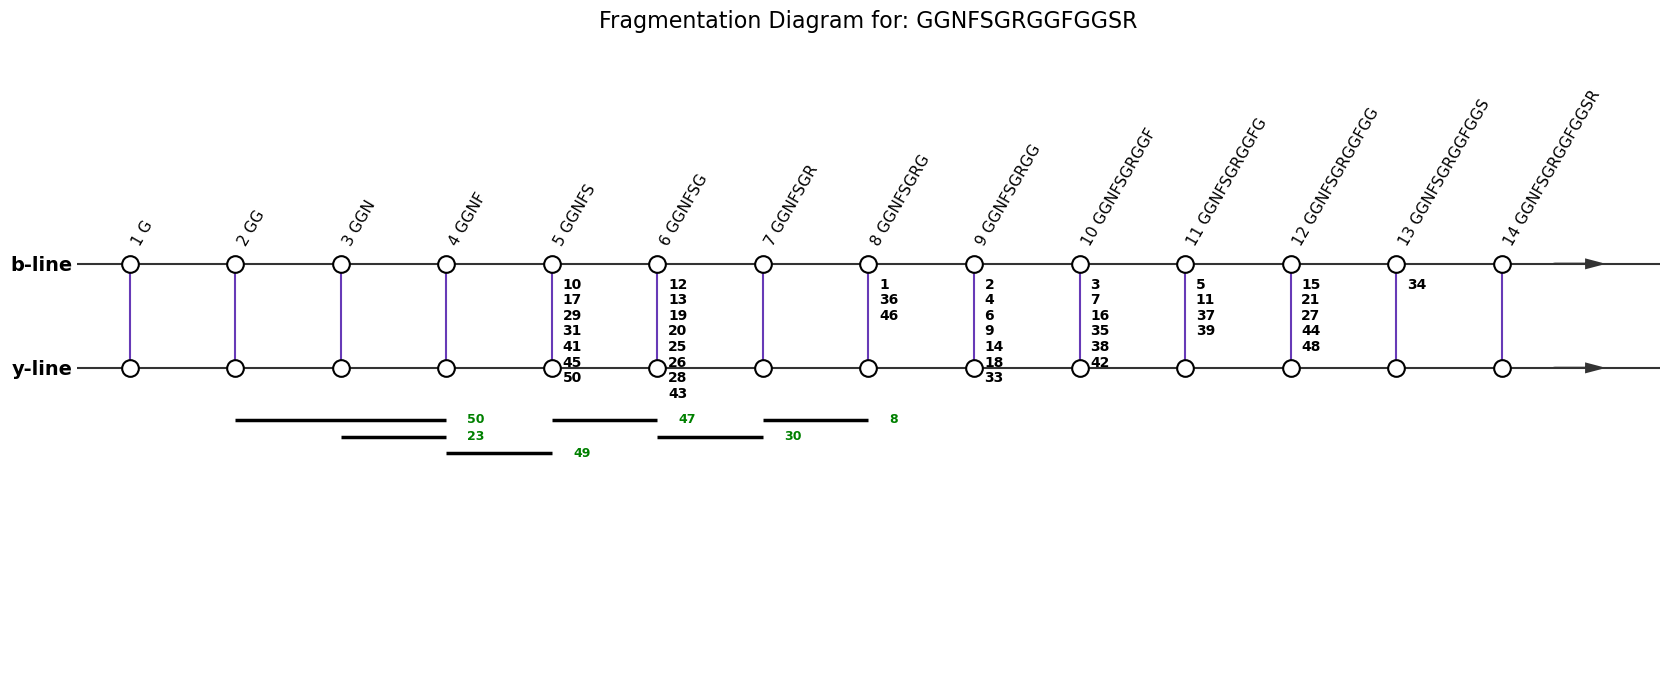

In [183]:

the_number = 1
data_number = f'data{the_number}'
df_whole = pd.read_csv(f'data/data_table/data_sheet{the_number}.csv')
data_loc = f'data/{data_number}.txt'

class_file = f"data/data_classification/classified_msms_{data_number}.csv"
data_frame = pd.read_csv(class_file)

# --- 1. Define your neutral loss color map ---
# Keys can be strings or numbers, whatever is in your DataFrame.
# Use a key like 'Other' for ions without a common neutral loss.
neutral_loss_colors = {
    'H2O': 'blue',
    'NH3': 'red',
    'HPO3': 'green',
    # Add any other common losses you want to track
    'Other': 'black' # This will be the color for unmapped losses
}

# --- 2. Modify your loop to create tuples ---
# ASSUMPTION: Your DataFrame `data_frame` has a column named 'neutral_loss'.
# Please change 'neutral_loss' to the actual name of your column.

def extract_sequence(peptide: str) -> str:
    """
    Remove modifications (e.g. Me), charge info (e.g. +2H, 2+),
    and keep only the plain amino acid sequence.
    
    Example:
    [GGNFSGRMeGGFGGSR+2H]2+  -->  GGNFSGRGGFGGSR
    """
    # 1. Remove surrounding brackets if present
    peptide = peptide.replace('(P)', '')
    peptide = peptide.replace('(nitro)', '')
    peptide = peptide.replace('(Me2)', '')
    peptide = peptide.replace('Me', '')
    peptide = peptide.replace('Ac', '')
    peptide = peptide.replace('(p)', '')
    peptide = peptide.replace('(NH2)', '')
    hydro_pattern = r'\+\d+H'
    peptide = re.sub(hydro_pattern, '', peptide)
    
    peptide = peptide.strip("[]")
    
    # 2. Remove modification tags like "Me", "Ox", "Ac" (assuming uppercase letters only are residues)
    # Keep only capital letters A–Z
    seq = re.sub(r'[^A-Z]', '', peptide)
    
    return seq



def parse_mass_spec_line(line):
    """
    Parses a single line of mass spectrometry data to extract y and b ion information.

    Args:
        line (str): A string containing the mass spec data for one line.

    Returns:
        tuple: A tuple containing (y_ion, y_mz, b_ion, b_mz).
               Returns None for any value that cannot be identified.
    """
    y_ion, y_mz, b_ion, b_mz = None, None, None, None

    # This regex pattern is designed to find an ion type (specifically 'y' or 'b' followed by numbers)
    # and its associated m/z value.
    # - .*?       : Non-greedily matches any character at the start.
    # - ([yb]\d+) : Captures the ion group, which must start with 'y' or 'b' and be followed by one or more digits.
    # - .*?       : Non-greedily matches any characters between the ion and the m/z value (e.g., "(1+)", "-NH3", etc.).
    # - @\s* : Matches the '@' symbol, followed by any whitespace.
    # - ([\d.]+)  : Captures the m/z value, which consists of digits and decimal points.
    pattern = re.compile(r'.*?([yb]\d+).*?@\s*([\d.]+)')

    # The data for y and b ions are separated by an '&'
    parts = line.split('&')

    for part in parts:
        # Search for the pattern in each part of the line
        match = pattern.search(part)
        if match:
            ion_name = match.group(1)
            mz_value = float(match.group(2))

            # Assign the found values based on whether it's a 'y' or 'b' ion
            if ion_name.startswith('y'):
                y_ion = ion_name
                y_mz = mz_value
            elif ion_name.startswith('b'):
                b_ion = ion_name
                b_mz = mz_value

    return y_ion, y_mz, b_ion, b_mz

def process_mass_spec_dataframe(df):
    """
    Applies the mass spec parser to a DataFrame column and expands the results.

    This function takes a DataFrame with a column named 'line', applies the 
    parse_mass_spec_line function to each row in that column, and adds four new 
    columns ('y_ion', 'y_mz', 'b_ion', 'b_mz') with the extracted data.

    Args:
        df (pd.DataFrame): The input DataFrame. Must contain a 'line' column.

    Returns:
        pd.DataFrame: The DataFrame with the four new columns added.
    """
    # Check if the required 'line' column exists
    if 'line' not in df.columns:
        raise ValueError("Input DataFrame must contain a 'line' column.")
        
    # Apply the parsing function to the 'line' column.
    # The result is a list of tuples, which we convert into a new DataFrame.
    parsed_data = df['line'].apply(parse_mass_spec_line)
    
    # Create a DataFrame from the list of tuples with specified column names.
    new_cols_df = pd.DataFrame(
        parsed_data.tolist(), 
        index=df.index, 
        columns=['y_ion', 'y_mz', 'b_ion', 'b_mz']
    )
    
    # Concatenate the new columns with the original DataFrame.
    return pd.concat([df, new_cols_df], axis=1)

data_frame = process_mass_spec_dataframe(data_frame)


with open(data_loc, "r", encoding="utf-8") as f:
    lines = [ln.rstrip("\n") for ln in f if ln.strip()]
peptide_header = lines[0]
seq = extract_sequence(peptide_header)

custom_annotations_list = [[] for _ in range(len(seq))]



# --- 3. Call the plotting function with the new arguments ---
# The internal_list generation remains the same as your original code
# ... (your code to create internal_list) ...

merged_data = data_frame.merge(df_whole, left_index=True, right_index=True)
#print(merged_data)

for index, each_row in merged_data.iterrows():
    if each_row['classification'] == 'usable' or each_row['classification'] == 'rare_mod':
        # Create the annotation tuple: (label, loss_type)
        # If your neutral loss column might be empty (None/NaN), you can handle it like this:
        loss_type = each_row.get('neutral_loss', 'Other')
        annotation_tuple = (each_row['n'], loss_type) 
        
        if each_row['y_ion'] is not None:
            y_index = int(each_row['y_ion'][1:])
            # Corrected index for y-ions
            custom_annotations_list[len(seq) - y_index].append(annotation_tuple)
        elif each_row['b_ion'] is not None:
            b_index = int(each_row['b_ion'][1:])
            custom_annotations_list[b_index - 1].append(annotation_tuple)


internal_list = []
for index, each_row in merged_data.iterrows():
    
    if type(each_row['ion1']) == str and each_row['ion1'][:2] == 'bi':
        
        the_index = peptide.Pep.extract_numbers(each_row['ion1'])
        the_index.sort()
        if len(the_index) == 2:
            #print(the_index)
            internal_list.append((the_index[0],the_index[1], each_row['n']))
    if type(each_row['ion2']) == str and each_row['ion2'][:2] == 'bi':
        the_index = peptide.Pep.extract_numbers(each_row['ion2'])
        the_index.sort()
        if len(the_index) == 2:
            internal_list.append((the_index[0],the_index[1], each_row['n']))
    
    if each_row['classification'] == 'non_complementary':
        ion1, ion2 = each_row['ion1'], each_row['ion2']
        if 'y' in ion1 and 'b' in ion2:
            internal_list.append((int(ion2[1:]), len(seq) - int(ion1[1:]),each_row['n']))
        if 'y' in ion2 and 'b' in ion1:
            internal_list.append((int(ion1[1:]), len(seq) - int(ion2[1:]),each_row['n']))
print(internal_list)
plot_peptide_fragmentation(seq, annotations=custom_annotations_list, internal_peptides=internal_list, show=True)

In [181]:
data_frame

,n,classification,line
0,1,usable,y7 (1+) @ 637.39 & b7 (1+) @ 690.36
1,2,usable,y6 (1+) @ 580.39 & b8 (1+) @ 747.43
2,3,usable,y5 (1+) @ 523.26 & b9 (1+) @ 804.37
3,4,usable,y6 (1+) @ 580.37 & [b8-NH3] (1+) @ 730.35
4,5,usable,[y4-NH3] (1+) @ 359.11 & b10 (1+) @ 951.13
5,6,usable,[b8-CH3NH2-NH3] (1+) @ 699.38 & y6 (1+) @ 580.59
6,7,usable,[y5-NH3] (1+) @ 506.09 & b9 (1+) @ 804.5
7,8,non_complementary,y6(1+) @ 580.43 & [b7-NH3] (1+) @ 673.04
8,9,usable,[y6-NH3] (1+) @ 562.87 & b8 (1+) @ 747.77
9,10,usable,[y10-CH3NH2] (1+) @ 921.04 & a4 (1+) @


In [307]:
import matplotlib.pyplot as plt
import re
import pandas as pd
from matplotlib.patches import Patch # Import Patch for the legend

def parse_sequence(sequence):
    """
    Parses a peptide sequence that may contain modified residues.
    """
    residues = re.findall('[A-Z][a-z]*', sequence)
    return residues

def generate_b_ion_fragments(residues):
    """
    Generates a list of cumulative b-ion fragment sequences from the N-terminus.
    """
    fragments = []
    current_fragment = ""
    for residue in residues:
        current_fragment += residue
        fragments.append(current_fragment)
    return fragments

def plot_peptide_fragmentation(sequence, annotations=None, y_line_annotations=None, internal_peptides=None, color_map=None, show=True, save_path=None):
    """
    Generates and displays a visualization of peptide fragmentation with custom string annotations and a legend.

    Args:
        sequence (str): The peptide sequence to visualize.
        annotations (list of lists of tuples, optional): 
            Annotations for ABOVE the b-line nodes. Format: [(string, color), ...].
        y_line_annotations (list of lists of tuples, optional):
            Annotations for BELOW the y-line nodes. Format: [(string, color), ...].
        internal_peptides (list of tuples, optional): Data for internal peptide lines.
                                                      Format: [(start, end, label), ...].
        color_map (dict, optional): A dictionary mapping molecule/loss names to colors for the legend.
        show (bool): Whether to display the plot.
        save_path (str, optional): Path to save the figure.
    """
    residues = parse_sequence(sequence)
    b_ion_fragments = generate_b_ion_fragments(residues)
    num_fragments = len(residues)

    fig, ax = plt.subplots(figsize=(max(12, num_fragments * 1.2), 7))
    y_b_line, y_y_line = 1.0, 0.0
    line_color = '#333333'
    line_width = 1.5

    # Drawing main b/y lines and arrows (unchanged)
    ax.axhline(y=y_b_line, color=line_color, lw=line_width, zorder=1)
    ax.axhline(y=y_y_line, color=line_color, lw=line_width, zorder=1)
    arrow_length = 0.3
    ax.arrow(num_fragments + 0.5, y_b_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)
    ax.arrow(num_fragments + 0.5, y_y_line, arrow_length, 0,
             head_width=0.08, head_length=0.15, fc=line_color, ec=line_color, lw=line_width, zorder=1)

    # Drawing vertical fragment lines and annotations
    for i, fragment in enumerate(b_ion_fragments):
        x_pos = i + 1
        ax.plot([x_pos, x_pos], [y_y_line, y_b_line], color='#673ab7', lw=1.5, zorder=2)
        ax.plot(x_pos, y_b_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        ax.plot(x_pos, y_y_line, 'o', ms=12, markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, zorder=3)
        label_text = f"{i+1} {fragment}"
        ax.text(x_pos, y_b_line + 0.15, label_text, ha='left', va='bottom', rotation=60, fontsize=11)

        # --- Annotations ABOVE the b-line node ---
        if annotations and i < len(annotations) and annotations[i]:
            y_text_start = y_b_line + 1.4
            y_text_step = 0.15
            for j, annotation_tuple in enumerate(annotations[i]):
                annotation_string, color = annotation_tuple
                y_text = y_text_start + (j * y_text_step)
                ax.text(x_pos, y_text, annotation_string, ha='center', va='bottom',
                        color=color, fontsize=9, fontweight='bold')
        
        # --- Annotations BELOW the y-line node ---
        if y_line_annotations and i < len(y_line_annotations) and y_line_annotations[i]:
            y_text_start = y_y_line - 0.15
            y_text_step = 0.15
            for j, annotation_tuple in enumerate(y_line_annotations[i]):
                annotation_string, color = annotation_tuple
                y_text = y_text_start - (j * y_text_step)
                ax.text(x_pos, y_text, annotation_string, ha='center', va='top',
                        color=color, fontsize=9, fontweight='bold')

    # --- Logic for plotting internal peptides (unchanged) ---
    if internal_peptides:
        y_internal_start, y_internal_step = -0.5, -0.16
        lane_ends = [-1.0] * 20
        sorted_peptides = sorted(internal_peptides, key=lambda p: (p[0], p[1] - p[0]))
        for start, end, label in sorted_peptides:
            placed = False
            for lane_idx in range(len(lane_ends)):
                if start > lane_ends[lane_idx] + 0.5:
                    y_pos = y_internal_start + (lane_idx * y_internal_step)
                    ax.plot([start, end], [y_pos, y_pos], color='black', linewidth=2.5, solid_capstyle='butt')
                    ax.text(end + 0.2, y_pos, str(label), ha='left', va='center', color='green', fontsize=6, fontweight='bold')
                    lane_ends[lane_idx] = float(end)
                    placed = True
                    break
            if not placed:
                print(f"Warning: Could not place internal peptide {label} ({start}-{end}).")

    # Adjust plot limits and appearance
    ax.set_xlim(0.5, num_fragments + 1.5)
    ax.set_ylim(-3.0, 3.0) 
    ax.set_yticks([y_y_line, y_b_line])
    ax.set_yticklabels(['y-line', 'b-line'], fontsize=14, fontweight='bold')
    ax.set_xticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(axis='y', length=0)
    plt.title(f'Fragmentation Diagram for: {sequence}', fontsize=16, pad=20)

    # --- NEW: Adding the legend ---
    if color_map:
        # Find which colors are actually used to avoid a cluttered legend.
        used_colors = set()
        if annotations:
            for site_annotations in annotations:
                for _, color in site_annotations:
                    used_colors.add(color)
        if y_line_annotations:
             for site_annotations in y_line_annotations:
                for _, color in site_annotations:
                    used_colors.add(color)
        
        # Create legend elements only for the colors that are present on the graph.
        legend_elements = [Patch(facecolor=color, edgecolor=color, label=label)
                           for label, color in color_map.items() if color in used_colors]

        if legend_elements:
            ax.legend(handles=legend_elements,
                      title="Neutral Loss",
                      bbox_to_anchor=(1.02, 1), # Position legend outside the plot
                      loc='upper left',
                      borderaxespad=0.)

    plt.tight_layout()

    if save_path:
        # Use bbox_inches='tight' to ensure the legend is included when saving.
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    if show:
        plt.show()
    plt.close()


In [308]:
# Peptide sequence: "VTIMPK" (6 residues)
# The annotations list must have 6 inner lists.

custom_annotations = [
    
    # annotations AFTER 'V' (position 1)
    [],  
    
    # annotations AFTER 'T' (position 2)
    [('ID: 6', 'green'), ('-NH3', 'red')], 
    
    # annotations AFTER 'I' (position 3)
    [],
    
    # annotations AFTER 'M' (position 4)
    [('ID: 20', 'green'), ('Oxidation', 'purple'), ('-H2O', 'blue')],

    # annotations AFTER 'P' (position 5)
    [('ID: 15', 'green')],

    # annotations AFTER 'K' (position 6)
    []
]

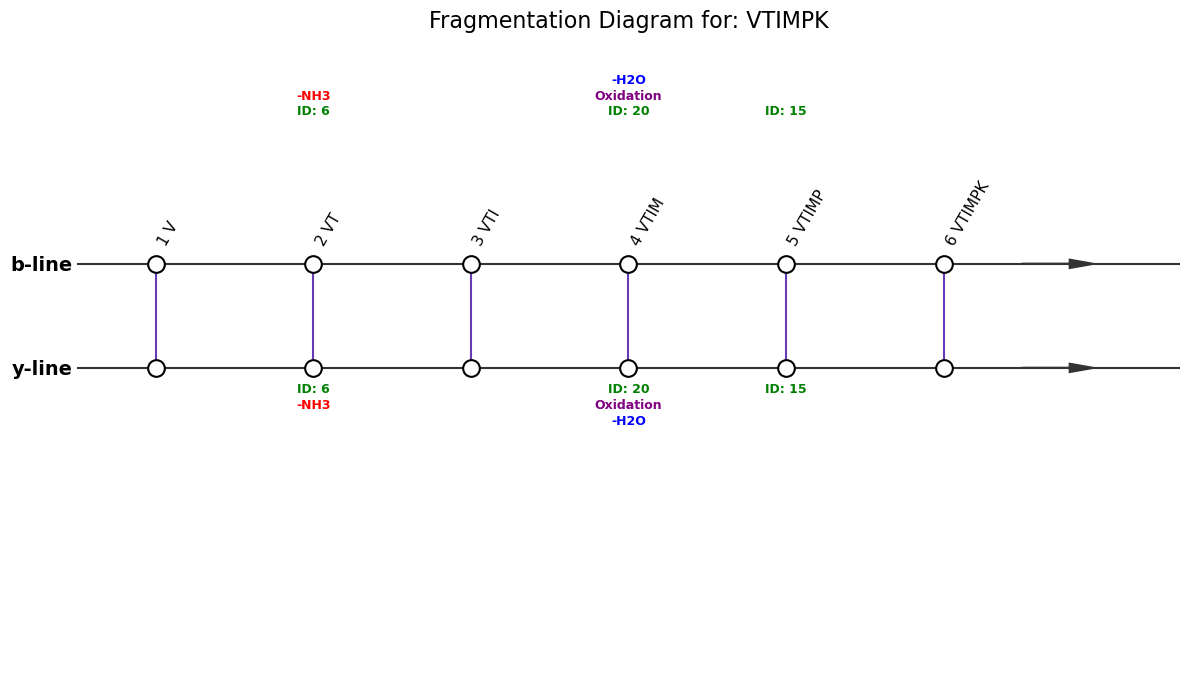

In [309]:
"VTIMPK"
plot_peptide_fragmentation("VTIMPK", annotations=custom_annotations, y_line_annotations = custom_annotations)

In [310]:
num = 1
the_list = []
the_y_list = []
data_loc = f'data/data{num}.txt'

with open(data_loc, "r", encoding="utf-8") as f:
    lines = [ln.rstrip("\n") for ln in f if ln.strip()]
peptide_header = lines[0]
peptide_header
the_df = pd.read_csv(f'data/data_table/data_sheet{num}.csv')
df_x = ion_data_organizer_d(the_df, peptide_header)
df_y = ion_data_organizer_y(the_df, peptide_header)





In [311]:
neutral_loss_colors = {
    'No Loss': '#7f7f7f',        # neutral gray
    'H2O': '#1f77b4',            # blue (water)
    '2(H2O)': '#aec7e8',         # lighter blue (double water)
    'NH3': '#2ca02c',            # green (ammonia)
    'NH3-H2O': '#98df8a',        # lighter green (mixed loss)
    'H2O-NH3': '#98df8a',        # same as above for symmetry
    'CH3NH2': '#ff7f0e',         # orange (methylamine)
    'CH3-NH2': '#ff7f0e',        # same as above (alternate notation)
    'CH3NH2-NH3': '#ffbb78',     # light orange (combined loss)
    'HCOH-H2O': '#8c564b',       # brown (formaldehyde + water)
    'HN=C=N-CH3': '#9467bd',     # purple (complex nitrogen loss)
    'HN=C=NH-2(H2O)': '#c5b0d5', # light lavender (related nitrogen loss)
    'G': '#17becf'               # cyan (internal acid or glycine fragment)
}

In [312]:
def create_annotation_list_from_df(df, peptide_length, color_map):
    """
    Processes a DataFrame for a SINGLE ion type (b or y) to create an annotation list.

    Args:
        df (pd.DataFrame): DataFrame with loss types as index and one type of ion (e.g., only 'y' columns) as columns.
        peptide_length (int): The total number of residues in the peptide.
        color_map (dict): A dictionary mapping loss types (DataFrame index) to colors.

    Returns:
        list: A single annotation list ready for the plotting function.
    """
    annotation_list = [[] for _ in range(peptide_length)]
    default_color = 'black'

    for loss_type, row in df.iterrows():
        color = color_map.get(loss_type, default_color)
        for ion_name, cell_value in row.items():
            if pd.notna(cell_value) and isinstance(cell_value, str):
                # --- MODIFIED: Extract a more detailed, specific label ---
                # This regex looks for a pattern like: y3 (-0.32) (1, 1) or b5-NH3-H2O (-0.06) (1, 1)
                # It captures the full ion name, the first parenthesis, and the first number from the second parenthesis.
                detailed_match = re.search(r'([aby]\d+[\w\-=\(\)]*?)\s+(\([^)]+\))\s*\((\d+)[^)]*\)', cell_value.strip())
                if detailed_match:
                    ion_part = detailed_match.group(1)
                    first_paren = detailed_match.group(2)
                    second_paren_num = detailed_match.group(3)
                    
                    if len(ion_part.split('-')) > 1:
                        ion_part = ion_part.split('-')[0]
                    #annotation_label = f"{ion_part} {first_paren} ({second_paren_num})"
                    annotation_label = f"{ion_part} {first_paren} {second_paren_num}"
                else:
                    # Fallback to the simpler version if the detailed format doesn't match
                    short_label_match = re.match(r'([aby]\d+)', cell_value.strip())
                    if short_label_match:
                        annotation_label = short_label_match.group(1)
                    else:
                        # Fallback in case the format is completely unexpected
                        annotation_label = cell_value 
                
                annotation_tuple = (annotation_label, color)
                # --- END MODIFICATION ---

                # Use regex to find ion type and number from the column header
                ion_match = re.match(r'([by])(\d+)', ion_name.strip())
                if ion_match:
                    ion_type = ion_match.group(1)
                    ion_number = int(ion_match.group(2))
                    
                    if ion_type == 'y':
                        # y-ions are indexed from the C-terminus
                        list_index = peptide_length - ion_number - 1
                        if 0 <= list_index < peptide_length:
                             annotation_list[list_index].append(annotation_tuple)
                    elif ion_type == 'b':
                        # b-ions are indexed from the N-terminus
                        list_index = ion_number - 1
                        if 0 <= list_index < peptide_length:
                            annotation_list[list_index].append(annotation_tuple)

    return annotation_list

In [313]:
#create_annotation_list_from_df()
the_length = len(peptide.Pep(peptide_header).AA_array)
b_list = create_annotation_list_from_df(df_x, the_length, neutral_loss_colors)
y_list = create_annotation_list_from_df(df_y, the_length, neutral_loss_colors)

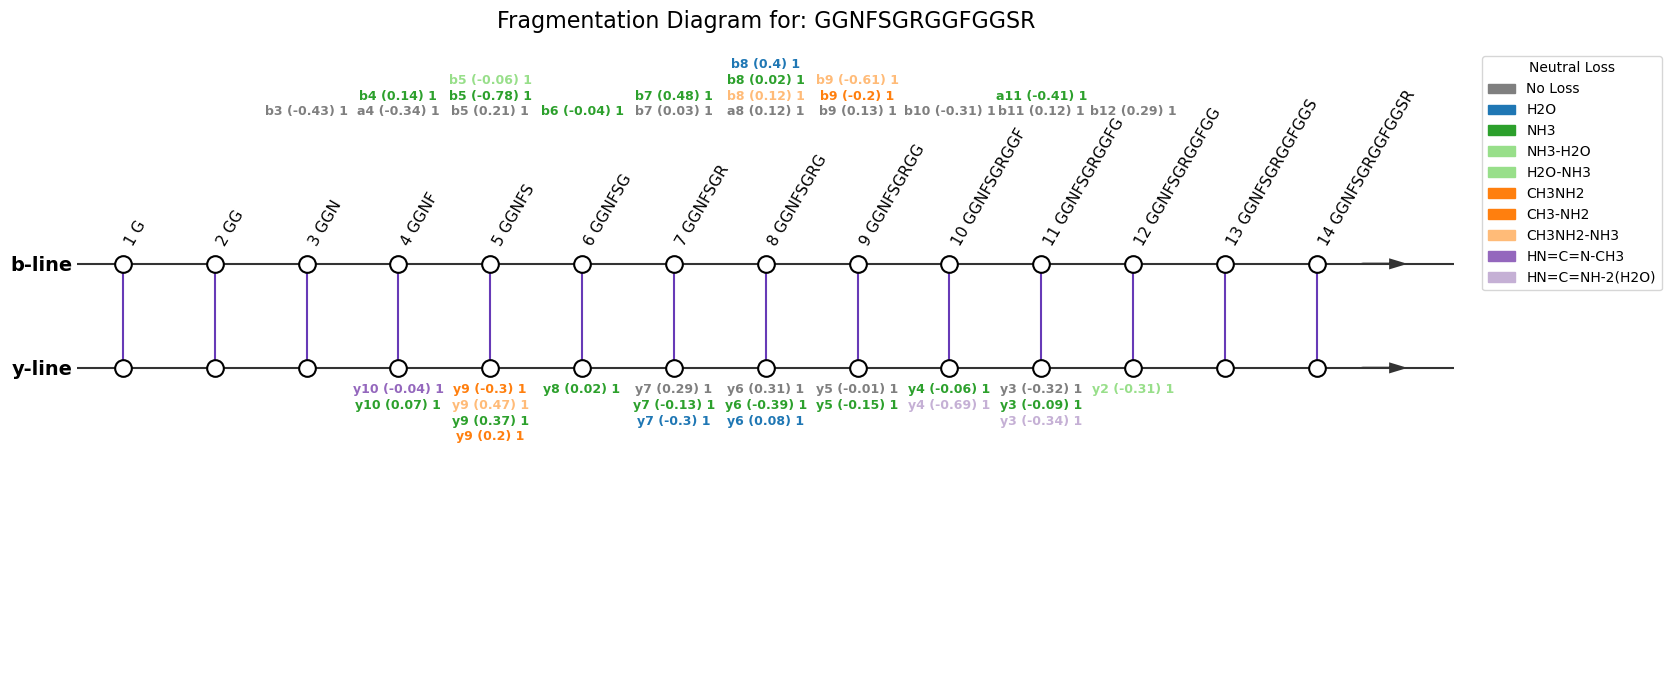

In [314]:
plot_peptide_fragmentation(peptide.Pep(peptide_header).seq, annotations=b_list, y_line_annotations = y_list, color_map=neutral_loss_colors)

In [268]:
df_x

,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12
No Loss,"b3 (-0.43) (1 , 1)","a4 (-0.34) (1 , 1)","b5 (0.21) (1 , 1)",NaN,"b7 (0.03) (1 , 1)","a8 (0.12) (1 , 1)","b9 (0.13) (1 , 1)","b10 (-0.31) (1 , 1)","b11 (0.12) (1 , 1)","b12 (0.29) (1 , 1)"
CH3-NH2,NaN,NaN,NaN,NaN,NaN,NaN,"b9-CH3-NH2 (-0.2) (1 , 1)",NaN,NaN,NaN
CH3NH2-NH3,NaN,NaN,NaN,NaN,NaN,"b8-CH3NH2-NH3 (0.12) (1 , 1)","b9-CH3NH2-NH3 (-0.61) (1 , 1)",NaN,NaN,NaN
NH3,NaN,"b4-NH3 (0.14) (1 , 1)","b5-NH3 (-0.78) (1 , 1)","b6-NH3 (-0.04) (1 , 1)","b7-NH3 (0.48) (1 , 1)","b8-NH3 (0.02) (1 , 1)",NaN,NaN,"a11-NH3 (-0.41) (1 , 1)",NaN
NH3-H2O,NaN,NaN,"b5-NH3-H2O (-0.06) (1 , 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2O,NaN,NaN,NaN,NaN,NaN,"b8-H2O (0.4) (1 , 1)",NaN,NaN,NaN,NaN
